In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import multiprocessing
import functools
from montecarlo import *
from itertools import count
from functools import wraps

%matplotlib inline
np.seterr(all='warn')
textwidth = 7.2
mpl.rcParams['figure.dpi'] = 100

if not hasattr(plt, 'old_subplots'): plt.old_subplots = plt.subplots
@wraps(plt.old_subplots)
def my_subplots(*args, **kwargs):
    if not 'figsize' in kwargs and len(args) > 1:
        width = 5
        maxwidth = 15
        rows, cols, *_ = args
        w = min(maxwidth, width * cols)
        kwargs['figsize'] = (w, w / cols / 1.6 * rows)
    
    gridspec_kw = dict()
    if kwargs.get('sharex') == 'col':
        gridspec_kw['hspace'] = 0.1
    if kwargs.get('sharey') == 'row':
        gridspec_kw['wspace'] = 0.1
    if 'gridspec_kw' in kwargs:
        gridspec_kw.update(kwargs['gridspec_kw'])
    kwargs['gridspec_kw'] = gridspec_kw
    
    return plt.old_subplots(*args, **kwargs)
        
plt.subplots = my_subplots

dict_keys(['t', 'alpha', 'mu', 'U', 'J', 'N', 'beta', 'normalise'])


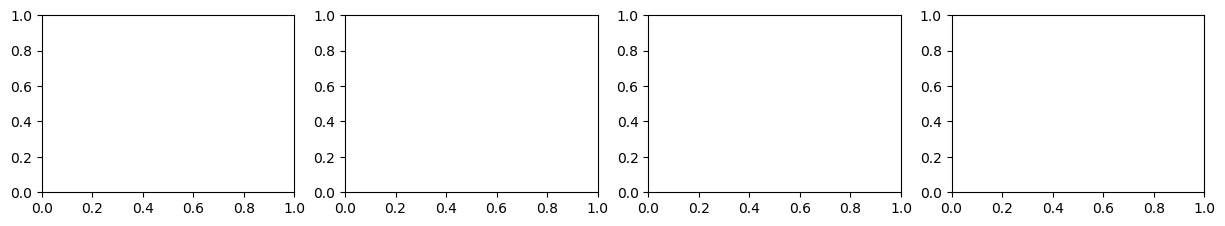

In [81]:
MCMC_params = dict(
        N_steps = 1e3, N_burn_in = 1e2, 
        state = np.arange(100)%2, 
        logger = Magnetisation_cumulants(N_cumulants = 5),
        proposal = p_multi_site_uniform_reflect,
        #proposal_args = dict(lam = 4),
        accept_function = perturbation_accept,
    )

model_params = dict(t = 1,
                    alpha = 3/2,
                    mu = 0,
                    U = 10,
                    J = np.array([1,-1]),
                    N = np.array([1,2,3]),
                    beta = np.linspace(0,2,100),
                    normalise = True,
                   )

print(model_params.keys())



def multi_dimensional_params(model_params):
    p = {k:v for k,v in model_params.items() if type(v) is np.ndarray and v.shape[0] > 1}
    other = {k:v for k,v in model_params.items() if not type(v) is np.ndarray or v.shape[0] < 1}
    N = len(p)
    
    def new_shape(i):
        s = np.ones(N, dtype = np.int)
        s[i] = -1
        return s
    overall_shape = [v.shape[0] for v in p.values()]
    broadcasted = {k : np.broadcast_to(v.reshape(new_shape(i)), overall_shape)
                   for i,k,v in zip(count(), p.keys(), p.values())
                  }
    other = {k : np.broadcast_to(v, overall_shape)
                   for k,v in other.items()
                  }
    broadcasted.update(other)
    return broadcasted
    
    
a = multi_dimensional_params(model_params)
i = (a['N'] == 64) & (a['beta'] == 100)

def func(J, N, beta, **kwargs):
    return J * beta**N

func(**a)

f, axes = plt.subplots(1,4)

In [28]:
x = np.array([1,2,3])
y = np.array([1,2,3])
z = np.array([1,2,3])

x.reshape(3,1,1) + y.reshape(1,3,1) + z.reshape(1,1,3)

array([[[3, 4, 5],
        [4, 5, 6],
        [5, 6, 7]],

       [[4, 5, 6],
        [5, 6, 7],
        [6, 7, 8]],

       [[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]])